### 목표
- 선형 회귀 이론에 대해서 알아보자
- 선형 회귀 모델의 원리를 직접 구현
- 공부 시간에 따른 성적데이터를 예측 

In [179]:
# 기본 라이브러리 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
# 공부 시간에 따른 성적 데이터 DataFrame 만들기
data = pd.DataFrame({'시간' : [2,4,8,9], '성적' : [20,40,80,90]},
            index = ['김가가', '박나나', '이다다', '최라라'])
data 

,시간,성적
김가가,2,20
박나나,4,40
이다다,8,80
최라라,9,90


### 선형회귀모델 실습
01. LinearRegression
    - 단순 수학공식을 활용하여 직선을 찾아나가는 방법으로써 
    - 단순선형회귀
   

In [181]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

In [182]:
# 모델 객체 생성
linear_model = LinearRegression()

In [183]:
# 모델 학습
# 모델명.fit(시간, 성적)  💥 시간(문제) 데이터는 반드시 2차원!!!
# (자:특성이 1개더라도!!) #자: 정답은 1차원

# 자영풀이
X = data[['시간']] # (4, 1)  # 자:2차원 형태 
y = data['성적']

linear_model.fit(X, y)

#쌤풀이
linear_model.fit(data[['시간']],data['성적'])


LinearRegression()

In [184]:
# 1차원
data['시간'].shape # (4,) 

(4,)

In [185]:
# 2차원
data[['시간']].shape # (4, 1) 

(4, 1)

In [186]:
# 모델 예측
# 모델명.predict(문제) -> 문제니까 2차원으로 넣어줘야함
# 7시간 공부했을 때 성적은?
linear_model.predict([[7]]) # array([70.])
# 70점으로 예측

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

In [187]:
# 모델이 예측한 가중치(w), 절편(b) 확인
# y = wx+b -> 우리가 예상한 그래프 y = 10x + 0
print("가중치(w): ", linear_model.coef_) # 가중치(w):  [10.]
print("절편(b): ", linear_model.intercept_) # 절편(b):  7.105427357601002e-15
# 절편값이 부동 소수점 (뒤에 있는 숫자만큼 소수점을 앞으로 이동 해석)
# 0.0000000000000007... -> 거의 0이라고 생각

# 모델의 예측 직선 : y = 10x + 0

가중치(w):  [10.]
절편(b):  7.105427357601002e-15


240422 월

### 경사하강법
- 선형모델 MSE가 최소가 되는 w(가중치), b(절편)을 찾는 방법
- 찾고자 하는 값의 변화에 따른 비용함수(cost)값의 변화 그래프를 출력
    - 비용함수 : 원래의 값이 가장 오차가 작은 가설 함수를 도출하기 위해 사용하는 함수

- 가중치 변화에 따른 MSE 변화 그래프 확인

In [189]:
# 가설함수 설정 (예측값) #자 : ŷ  (y hat ==y_pre)
def h(w,x):
    return w * x + 0

In [190]:
# 비용함수 (MSE)
# ((예측값 - 실제값) ** 2 ).mean()

# 자:def cost (실제값, 예측값, 가중치)
# 자:def cost (x, y, w)
def cost (data, target, weight):
    y_pre = h(weight, data) # 이 수식에 의해서 예측값이 나오게 된다
    mse = ((y_pre - target) ** 2).mean() 
    return mse
    
    

In [191]:
# 예측한 가중치 w가 10일때 MSE 값은? > 0
# y = 10*x + 0 
cost(data['시간'], data['성적'], 10) # 0.0

0.0

In [192]:
# 예측한 가중치 w가 5일 경우 
cost(data['시간'], data['성적'], 5) # 1031.25

1031.25

In [193]:
# 예측한 가중치 w가 15일 경우 
cost(data['시간'], data['성적'], 15) # 1031.25

1031.25

In [194]:
# 예측한 가중치 w가 3일 경우 
cost(data['시간'], data['성적'], 3) # 2021.25

2021.25

In [195]:
# w값에 따른 mse변화율 그래프 그려보기!
w_arr = range(-10, 31) #자 : -10~30
# 가중치 변화에 따른 mse 값을 리스트에 저장
cost_list = []
for w in w_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

TypeError: 'str' object is not callable

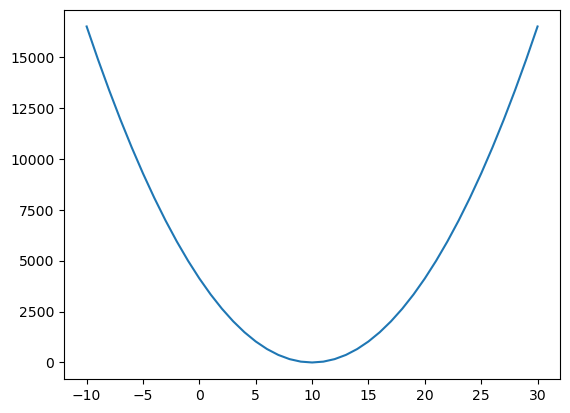

In [196]:
# 그래프 출력
plt.plot(w_arr, cost_list)
plt.xlabel('w')
plt.ylabel('mse')

### SGDRegressor
- Stochastic Gradient Desecent, 확률적 경사 하강법
- 사이킷런에서 구성해놓은 경사하강법을 활용한 선형회귀 
- 경사하강법을 이용하는 모델

In [197]:
# 모델 불러오기~
from sklearn.linear_model import SGDRegressor

In [198]:
# 모델 객체생성
sgd_model = SGDRegressor(eta0=0.001, # learning_rate : 학습률
                        max_iter=500, # 반복횟수, 업데이트 횟수
                        verbose=1) # 진행상황 출력

In [199]:
# 모델 학습
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.19, NNZs: 1, Bias: 0.172587, T: 4, Avg. loss: 1902.064818
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 1, Bias: 0.293865, T: 8, Avg. loss: 1496.003802
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.73, NNZs: 1, Bias: 0.391502, T: 12, Avg. loss: 1222.558443
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.32, NNZs: 1, Bias: 0.473857, T: 16, Avg. loss: 1018.584795
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.83, NNZs: 1, Bias: 0.545088, T: 20, Avg. loss: 859.401225
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.28, NNZs: 1, Bias: 0.607697, T: 24, Avg. loss: 731.789642
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.67, NNZs: 1, Bias: 0.663352, T: 28, Avg. loss: 627.600367
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.03, NNZs: 1, Bias: 0.713248, T: 32, Avg. loss: 541.380743
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.35, NNZs: 1, Bias: 0.758277, T: 36, Avg. loss: 469.281461
Total training time: 0.00

SGDRegressor(eta0=0.001, max_iter=500, verbose=1)

In [200]:
# 모델 예측
sgd_model.predict([[7]]) # 학습률 0.0001 =>array([70.03157567])
# 학습률 0.001=>array([69.88271009])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88641712])

In [201]:
# 가중치 절편 확인 
print("w(가중치):", sgd_model.coef_) # w(가중치): [9.85662451]
print("b(절편):", sgd_model.intercept_) # b(절편): [1.03520409]
#예측직선 y = 9x +1 

w(가중치): [9.79124314]
b(절편): [1.34771511]


### 호주 집가격 예측
- 회귀모델

In [202]:
# 데이터 로드 읽어오기~
house_data = pd.read_csv('data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [203]:
# 요약정보 확인
house_data.info()
# 20개의 특성, 1개의 정답(Price)
# 결측치 유무 확인 -> 있음
# Dtype -> 숫자형태의 데이터만 학습 가능!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [204]:
# 모델링을 위한 특성 선택 -> Price 정답데이터와 상관관계가 높은 컬럼 5개 선택
house_data.corr(numeric_only=True) # 자:상관관계 # 숫자데이터에 대해서만 상관관계 조회

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [205]:
# 특성선택 5개
# 자영풀이
feautre_name_jy = [house_data.loc['Rooms'], house_data.loc['Bedroom2'],house_data.loc['Bathroom'],house_data.loc['Lattitude'],house_data.loc['Longtitude']]

feautre_name_jy
# Rooms 0.496634
# Bedroom2 0.475951
# Bathroom 0.467038
# Lattitude -0.212934
# Longtitude 0.203656

# 결측치 존재 # YearBuilt


KeyError: 'Rooms'

In [206]:
# 특성선택 5개
# 쌤풀이
feautre_name = ['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Distance']
feautre_name # ['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Distance']

# Distance	: 시내로부터 떨어진 거리
# Lattitude : 위도


['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Distance']

In [207]:
# 문제
X = house_data[feautre_name]
# 정답
y = house_data['Price']

In [208]:
# 훈련용, 평가용 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,
                                                    random_state=22)

In [209]:
# 크기확인
print(X_train.shape, y_train.shape) # (9506, 5) (9506,)
print(X_test.shape, y_test.shape) # (4074, 5) (4074,)

(9506, 5) (9506,)
(4074, 5) (4074,)


In [240]:
# 모델 생성

# 쌤풀이
# 단순 mse 활용 선형회귀모델 ->house_linear_model
house_linear_model = LinearRegression()

# 경사하강법을 활용한 선형회귀모델 (하이퍼파라미터조절X) -> house_sgd_model
house_sgd_model = SGDRegressor()



In [241]:
# 학습
house_linear_model.fit(X_train, y_train)
house_sgd_model.fit(X_train, y_train)

SGDRegressor()

In [242]:
# 평가지표(mse)
from sklearn.metrics import mean_squared_error # 평균제곱오차
# metrics : 평가지표 모음


In [243]:
# 예측
linear_pre = house_linear_model.predict(X_test)

In [244]:
# 평가
# mean_squared_error(실제답, 예측답)
print('linear_mse : ', mean_squared_error(y_test, linear_pre)) # linear_mse :  230460176519.23233

linear_mse :  230460176519.23233


In [245]:
# sgd_model의 평가 및 mes 확인
sgd_pre = house_sgd_model.predict(X_test)
print('sge_mse: ', mean_squared_error(y_test,sgd_pre))
# 단순 linear 모델보다 오차가 큰 것을 확인
# sgd 모델은 경사하강법을 활용 -> 초기 값을 랜덤으로 설정
# 평가 결과가 달라질 수 있음!

sge_mse:  339713288305.0459


In [247]:
# 오차를 제곱하다보니 셜과도 제곱 -> 단위 문제
# 해결하기 위해서 오차에 루트
# RMSE
print('linear_mse : ', mean_squared_error(y_test, linear_pre) **0.5) 
print('sge_mse: ', mean_squared_error(y_test,sgd_pre) ** 0.5)
# 약 48만달러의 오차가 있음을 확인

linear_mse :  480062.67978174717
sge_mse:  582849.2843823744


In [249]:
# r2 score
# 오차로만 성능을 파악하기에는 비교대상이 XX
# 실제 데이터에서 오차와 예측 데이터에서 오차를 비교하여 
# 차이를 확인 -> 1에 가까울수록 잘 예측했다라고 판단

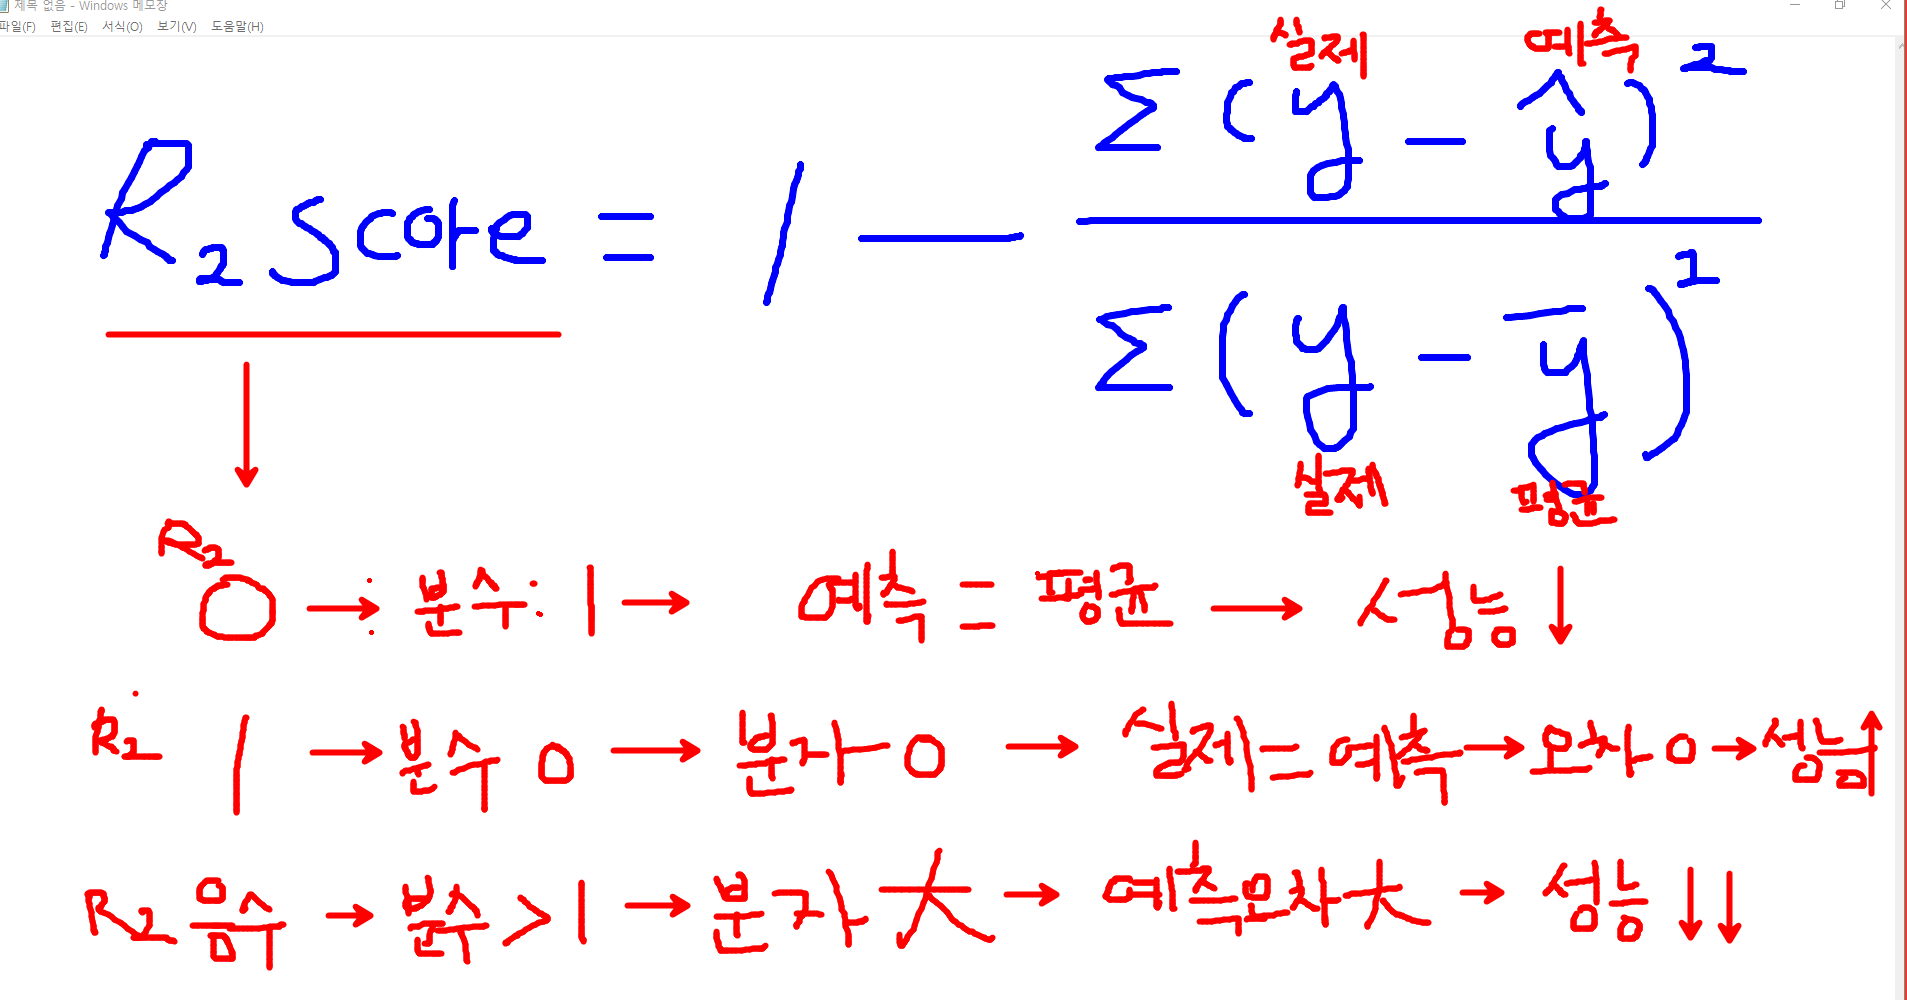

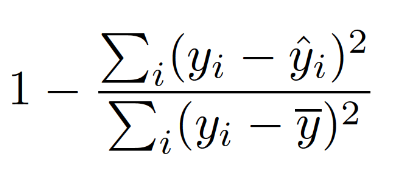

### 회귀모델의 평가지표
- MSE(MeanSquaredError, 평균제곱오차)
    - 실제 데이터와 예측 데이터의 차이를 제곱 -> 평균
- RMSE(RootMeanSquaredError)
    - MSE에 루트를 씌워줌으로써 단위 문제를 해결
- MAE(MeanAbsoluteError, 평균절댓값오차)
    - 실제 데이터와 예측 데이터의 차이 절댓값 ->평균(부호)
- r2 score 
    - 위 3개의 지표들은 오차로 판단하기 때문에 공통적인 평가방법이 아니더라, 정규하된 방법으로 회귀모델을 평가하기 위하여 나온 평가지표
    - 실제값과 예측값의 분산 비교
    - 실제 데이터에서 오차와 예측 데이터에서의 오차 비교
    - 1에 가까울수록 잘 예측했다고 판별

In [253]:
# r2 score 구해보기
print("Linear score: ", house_linear_model.score(X_test, y_test))
print('SGD score: ', house_sgd_model.score(X_test, y_test))

Linear score:  0.4520962940869184
SGD score:  0.19235430423823863


### 스케일링 적용
- 선형모델 각 특성에 스케일에 영향을 받는 모델(오차계산 -> 거리셰간)
- 경사하강법 적용 시 학습의 안정성을 위해서 스케일링 진행


In [256]:
# 도구 불러오기
from sklearn.preprocessing import StandardScaler

In [258]:
# 스케일러 생성
std_scaler = StandardScaler()

In [265]:
# 스케일러 -> X_train에 대해서 학습 -> 변환
X_train_scale = std_scaler.fit_transform(X_train)
X_test_scale = std_scaler.fit_transform(X_test)

In [330]:
# 쌤풀이

# 다시 모델 학습 및 평가
# linear_model2
linear_model2= LinearRegression()
linear_model2.fit(X_train_scale, y_train)
# sgd_model2
sgd_model2= SGDRegressor(eta0=0.001)
sgd_model2.fit(X_train_scale, y_train)

# 평가(r2 score로 평가)
print("스케일링 진행한 linear score : ", linear_model2.score(X_test, y_test))
print("스케일링 진행한 sgd score : ", sgd_model2.score(X_test, y_test))

스케일링 진행한 linear score :  -56.67479609028194
스케일링 진행한 sgd score :  -56.630024537266635


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [271]:
# 자영풀이
linear_model21= LinearRegression()
sgd_model21= SGDRegressor()

linear_model21.fit(X_train_scale, y_train)
sgd_model21.fit(X_train_scale, y_train)


SGDRegressor()

In [274]:
linear_model21.score(X_test, y_test)
sgd_model21.score(X_test, y_test)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


-62.103130329151554